<a href="https://colab.research.google.com/github/AnuAsai22/Lead_Scoring_CaseStudy/blob/main/Lead_Scoring_AnuFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import the required Libraries.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss

%matplotlib inline
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/lead_scoring')

**Step-1: CREATING DATA FRAME**

In [4]:
ls=pd.read_csv('Leads.csv')

In [5]:
ls.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [6]:
ls.shape

(9240, 37)

In [7]:
ls.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [8]:
ls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [9]:
ls[ls.duplicated()==True]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


There are no duplicates in the dataframe

**Step 2: DATA PREPARATION AND MISSING VALUES HANDLING**


In [10]:
ls.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

Dropping Prospect ID and Lead Number because they are unique and we already have index column to do the same

In [11]:
ls.drop(["Prospect ID","Lead Number"],axis=1,inplace=True)
ls.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


Here we can find 'select' as values in many columns which are left without filling by the customers. So replacing those values with 'Nan'

In [12]:
ls.replace("Select",np.NaN,inplace=True)
ls.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [13]:
ls.nunique()

Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                   

In [14]:
ls.drop(["Magazine","Receive More Updates About Our Courses","Update me on Supply Chain Content","Get updates on DM Content","I agree to pay the amount through cheque"],axis=1,inplace=True)
ls.head()

#Removed few columns having only one unique values as it not affect the analysis

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,Interested in other courses,Low in Relevance,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,Ringing,NaN,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,Will revert after reading the email,Might be,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,Ringing,Not Sure,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,Will revert after reading the email,Might be,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,Modified


In [15]:
#Null values analysis
round(100*(ls.isnull().sum()/len(ls.index)),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [16]:
#dropping all the columns having more than 50% missing values

cols=ls.columns
for i in cols:
    if((100*(ls[i].isnull().sum()/len(ls.index)))>=50):
        ls.drop(i,1,inplace=True)

In [17]:
ls.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Digital Advertisement,Through Recommendations,Tags,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,No,Interested in other courses,NaN,02.Medium,02.Medium,15.0,15.0,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,No,Ringing,NaN,02.Medium,02.Medium,15.0,15.0,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,No,Will revert after reading the email,Mumbai,02.Medium,01.High,14.0,20.0,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,No,Ringing,Mumbai,02.Medium,01.High,13.0,17.0,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,No,Will revert after reading the email,Mumbai,02.Medium,01.High,15.0,18.0,No,Modified


In [18]:
round(100*(ls.isnull().sum()/len(ls.index)),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

In [19]:
##Checking the columns with binary category (YES/NO) values

bc=["Do Not Email","Do Not Call","Search","Newspaper Article","X Education Forums","Newspaper","Digital Advertisement","Through Recommendations","A free copy of Mastering The Interview"]
for col in bc:
    print(ls[col].value_counts(normalize=True)*100)
    print("\n\n")

No     92.056277
Yes     7.943723
Name: Do Not Email, dtype: float64



No     99.978355
Yes     0.021645
Name: Do Not Call, dtype: float64



No     99.848485
Yes     0.151515
Name: Search, dtype: float64



No     99.978355
Yes     0.021645
Name: Newspaper Article, dtype: float64



No     99.989177
Yes     0.010823
Name: X Education Forums, dtype: float64



No     99.989177
Yes     0.010823
Name: Newspaper, dtype: float64



No     99.95671
Yes     0.04329
Name: Digital Advertisement, dtype: float64



No     99.924242
Yes     0.075758
Name: Through Recommendations, dtype: float64



No     68.744589
Yes    31.255411
Name: A free copy of Mastering The Interview, dtype: float64





Dropping some of the above listed binary valued columns with data imbalance as it is not useful for analysis

In [20]:
ib_cols = ["Do Not Call","Search","Newspaper Article","X Education Forums","Newspaper","Digital Advertisement","Through Recommendations"]
ls.drop(ib_cols,axis=1,inplace=True)
ls.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Tags,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,Interested in other courses,NaN,02.Medium,02.Medium,15.0,15.0,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,Ringing,NaN,02.Medium,02.Medium,15.0,15.0,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,Will revert after reading the email,Mumbai,02.Medium,01.High,14.0,20.0,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,Ringing,Mumbai,02.Medium,01.High,13.0,17.0,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,Will revert after reading the email,Mumbai,02.Medium,01.High,15.0,18.0,No,Modified


In [21]:
ls.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'City',
       'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [22]:
ls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 20 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Converted                                      9240 non-null   int64  
 4   TotalVisits                                    9103 non-null   float64
 5   Total Time Spent on Website                    9240 non-null   int64  
 6   Page Views Per Visit                           9103 non-null   float64
 7   Last Activity                                  9137 non-null   object 
 8   Country                                        6779 non-null   object 
 9   Specialization                                 5860 

In [23]:
ls.Tags.value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In 'Tags' column all less frequency options are grouped to a single option and missing values are grouped as 'Not Provided'. It can be dropped later if it is not important in future.

In [24]:
ls['Tags']=ls['Tags'].replace(["invalid number","Diploma holder (Not Eligible)","wrong number given","opp hangup","number not provided","in touch with EINS","Lost to Others","Still Thinking","Want to take admission but has financial problems","Interested in Next batch","In confusion whether part time or DLP","Lateral student","University not recognized","Shall take in the next coming month","Recognition issue (DEC approval)"],"OtherTags")
ls['Tags']=ls['Tags'].fillna('Not Provided') 
ls.Tags.value_counts()

Not Provided                           3353
Will revert after reading the email    2072
Ringing                                1203
Interested in other courses             513
Already a student                       465
Closed by Horizzon                      358
OtherTags                               302
switched off                            240
Busy                                    186
Lost to EINS                            175
Not doing further education             145
Interested  in full time MBA            117
Graduation in progress                  111
Name: Tags, dtype: int64

In [25]:
ls['Last Notable Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In 'Last Notable Activity' Column grouped some less frequency actions to single option like we did for 'tags'

In [26]:
ls['Last Notable Activity']=ls['Last Notable Activity'].replace(['Had a Phone Conversation','Email Marked Spam','Unreachable','Unsubscribed','Email Bounced','Resubscribed to emails','View in browser link Clicked','Approached upfront','Form Submitted on Website','Email Received'],'Other Activities')
ls['Last Notable Activity'].value_counts()

Modified                   3407
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Other Activities            160
Name: Last Notable Activity, dtype: int64

In [27]:
ls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 20 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Converted                                      9240 non-null   int64  
 4   TotalVisits                                    9103 non-null   float64
 5   Total Time Spent on Website                    9240 non-null   int64  
 6   Page Views Per Visit                           9103 non-null   float64
 7   Last Activity                                  9137 non-null   object 
 8   Country                                        6779 non-null   object 
 9   Specialization                                 5860 

In [28]:
act_col=["Asymmetrique Activity Index","Asymmetrique Profile Index","Asymmetrique Activity Score","Asymmetrique Profile Score"]
for col in act_col:
    print(ls[col].value_counts(normalize=True)*100)
    print("\n")

02.Medium    76.443648
01.High      16.348068
03.Low        7.208284
Name: Asymmetrique Activity Index, dtype: float64


02.Medium    55.515731
01.High      43.866985
03.Low        0.617284
Name: Asymmetrique Profile Index, dtype: float64


14.0    35.264835
15.0    25.746714
13.0    15.432099
16.0     9.299084
17.0     6.949423
12.0     3.902828
11.0     1.891677
10.0     1.135006
9.0      0.179211
18.0     0.099562
8.0      0.079650
7.0      0.019912
Name: Asymmetrique Activity Score, dtype: float64


15.0    35.025886
18.0    21.326165
16.0    11.927519
17.0    11.529271
20.0     6.133015
19.0     4.878534
14.0     4.500199
13.0     4.062127
12.0     0.438072
11.0     0.179211
Name: Asymmetrique Profile Score, dtype: float64




In [29]:
round(100*(ls.isnull().sum()/len(ls.index)),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Tags                                              0.00
City                                             39.71
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Score                       45.65
A free cop

Some of the columns above are related to customer activity and have high number of missing values . So we dropping them for better analysis.

In [30]:
ls.drop(act_col,axis=1,inplace=True)
ls.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,Interested in other courses,NaN,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,Ringing,NaN,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,Will revert after reading the email,Mumbai,No,Modified


In [31]:
round(100*(ls.isnull().sum()/len(ls.index)),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Tags                                              0.00
City                                             39.71
A free copy of Mastering The Interview            0.00
Last Notable Activity                             0.00
dtype: float64

Now moving to rows and deleting the rows that have more than 25% of missing values. Also I am storing the actual no.of.rows and columns if it is needed later

In [32]:
original_rows=ls.shape[0]
original_columns=ls.shape[1]

In [33]:
print(round(((ls[ls.Converted==1].shape[0]/ls[ls.Converted==0].shape[0])*100),2),"%")

62.7 %


In [34]:
null_row=[] ##storing the index of >25% null rows in the null_Row List
count=0
for i in range(ls.shape[0]):
    if (ls.iloc[i].isnull().sum())>((ls.shape[1])*.25):
        null_row.append(i)
        count=count+1
print(count)

922


In [35]:
print((count/original_rows)*100)

9.978354978354979


From above result, it shows that only 9.97% of rows are getting impacted, so deleting these rows won't affect the analysis

In [36]:
for i in null_row:
    ls.drop(i, axis=0, inplace=True)
ls.shape

(8318, 16)

In [37]:
print(original_rows-ls.shape[0])  #Number of rows deleted

922


In [38]:
print(round(((ls[ls.Converted==1].shape[0]/ls[ls.Converted==0].shape[0])*100),2),"%")

70.52 %


In [39]:
round(100*(ls.isnull().sum()/len(ls.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.36
Do Not Email                                      0.00
Converted                                         0.00
TotalVisits                                       0.61
Total Time Spent on Website                       0.00
Page Views Per Visit                              0.61
Last Activity                                     0.43
Country                                          18.50
Specialization                                   29.71
What is your current occupation                  22.20
What matters most to you in choosing a course    22.43
Tags                                              0.00
City                                             33.29
A free copy of Mastering The Interview            0.00
Last Notable Activity                             0.00
dtype: float64

Null Values has reduced in new data frame and also converted 1 to not converted 0 is 70%

In [40]:
ls["Lead Source"].value_counts(normalize=True,dropna=False)*100

Google               34.479442
Direct Traffic       30.572253
Organic Search       13.873527
Olark Chat           11.024285
Reference             5.878817
Welingak Website      1.550854
Referral Sites        1.502765
Facebook              0.420774
NaN                   0.360664
bing                  0.072133
google                0.060111
Click2call            0.048088
Social Media          0.024044
Live Chat             0.024044
Press_Release         0.024044
Pay per Click Ads     0.012022
blog                  0.012022
WeLearn               0.012022
welearnblog_Home      0.012022
youtubechannel        0.012022
testone               0.012022
NC_EDM                0.012022
Name: Lead Source, dtype: float64

**"Lead Source"**:
Let us impute missing "Lead Source" column with mode value and group the smaller contributing values together as they can't be much significant alone.

In [41]:
ls["Lead Source"].fillna(ls["Lead Source"].mode()[0],inplace=True)

In [42]:
ls["Lead Source"].value_counts(normalize=True,dropna=False)*100

Google               34.840106
Direct Traffic       30.572253
Organic Search       13.873527
Olark Chat           11.024285
Reference             5.878817
Welingak Website      1.550854
Referral Sites        1.502765
Facebook              0.420774
bing                  0.072133
google                0.060111
Click2call            0.048088
Press_Release         0.024044
Social Media          0.024044
Live Chat             0.024044
youtubechannel        0.012022
testone               0.012022
Pay per Click Ads     0.012022
welearnblog_Home      0.012022
WeLearn               0.012022
blog                  0.012022
NC_EDM                0.012022
Name: Lead Source, dtype: float64

In [43]:
ls["Lead Source"]=ls["Lead Source"].apply(lambda x:"Google" if x=="google" else (x if((x=='Google') | (x=='Direct Traffic') | (x=='Olark Chat') | (x=='Organic Search') | (x=='Reference')) else 'Other Web Sites') )
ls["Lead Source"].value_counts(normalize =True, dropna=False)*100

Google             34.900216
Direct Traffic     30.572253
Organic Search     13.873527
Olark Chat         11.024285
Reference           5.878817
Other Web Sites     3.750902
Name: Lead Source, dtype: float64

In [44]:
round(100*(ls.isnull().sum()/len(ls.index)),2)

Lead Origin                                       0.00
Lead Source                                       0.00
Do Not Email                                      0.00
Converted                                         0.00
TotalVisits                                       0.61
Total Time Spent on Website                       0.00
Page Views Per Visit                              0.61
Last Activity                                     0.43
Country                                          18.50
Specialization                                   29.71
What is your current occupation                  22.20
What matters most to you in choosing a course    22.43
Tags                                              0.00
City                                             33.29
A free copy of Mastering The Interview            0.00
Last Notable Activity                             0.00
dtype: float64

In [45]:
ls.Specialization.value_counts(dropna=False)

NaN                                  2471
Finance Management                    974
Human Resource Management             847
Marketing Management                  835
Operations Management                 501
Business Administration               402
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     336
Media and Advertising                 203
Travel and Tourism                    202
International Business                178
Healthcare Management                 159
Hospitality Management                113
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In the 'Specialization' column Filling NaN values as "Not Provided"  Since the percentage of missing values are high I am not imputing them.

In [46]:
ls['Specialization'] = ls['Specialization'].fillna('Not Provided')

In [47]:
ls["What is your current occupation"].value_counts(dropna=False)

Unemployed              5531
NaN                     1847
Working Professional     696
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

Imputing 'NaN' value of "What is your current occupation" with mode value

In [48]:
ls["What is your current occupation"].fillna((ls["What is your current occupation"].mode()[0]),inplace=True) 

In [49]:
ls["What is your current occupation"].value_counts(dropna=False)

Unemployed              7378
Working Professional     696
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [50]:
ls["What matters most to you in choosing a course"].value_counts(dropna=False)

Better Career Prospects      6449
NaN                          1866
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

Filling NaN value of "What matters most to you in choosing a course" as "Not Provided". I am not inputing it with mode as the percentage of missing values are high

In [51]:
ls["What matters most to you in choosing a course"] = ls["What matters most to you in choosing a course"].fillna('Not Provided')

In [52]:
ls["What matters most to you in choosing a course"].value_counts(dropna=False)

Better Career Prospects      6449
Not Provided                 1866
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [53]:
ls.Country.value_counts(dropna=False)

India                   6492
NaN                     1539
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [54]:
ls["Country"].fillna(ls["Country"].mode()[0],inplace=True)
ls["Country"].value_counts()

India                   8031
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In the country column 'Nan' values are filled with "India" and all countries other than India are grouped just as "Foriegn Country" for better analysis

In [55]:
ls["Country"]=ls.Country.apply(lambda x:x if x=="India" else "Foriegn Country")
ls.Country.value_counts(dropna=False)

India              8031
Foriegn Country     287
Name: Country, dtype: int64

In [56]:
ls.City.value_counts(dropna=False)

Mumbai                         3211
NaN                            2769
Thane & Outskirts               752
Other Cities                    684
Other Cities of Maharashtra     450
Other Metro Cities              378
Tier II Cities                   74
Name: City, dtype: int64

In [57]:
# Grouped all non-mumbai and Maharashtra cities
ls.loc[(ls.City=='Thane & Outskirts') | (ls.City=='Other Cities of Maharashtra'),'City']='Other Maharashtra Cities'

# Grouped all the other non Maharashtra cities
ls.loc[(ls.City=='Other Cities') | (ls.City=='Other Metro Cities') | (ls.City=='Tier II Cities'),'City']='Non Maharashtra Cities'

In [58]:
ls.City.value_counts(normalize=True)*100

Mumbai                      57.866282
Other Maharashtra Cities    21.661561
Non Maharashtra Cities      20.472157
Name: City, dtype: float64

**City Column**

-->Created a single category group for all cities in Maharashtra (except Mumbai)

-->Created Anoter category group for all other non Maharashtra cities

-->Also checked the proportion in which the count is distributed among these cities

-->Now we can distribute the 'Nan' values of City Column in the same proportion among these categories

In [59]:
ls["City"].fillna((ls["City"].mode()[0]),inplace=True) 

In [60]:
ls.City.value_counts(normalize=True)*100

Mumbai                      71.892282
Other Maharashtra Cities    14.450589
Non Maharashtra Cities      13.657129
Name: City, dtype: float64

In [61]:
ls.City.value_counts(dropna=False)

Mumbai                      5980
Other Maharashtra Cities    1202
Non Maharashtra Cities      1136
Name: City, dtype: int64

In [62]:
ls["Last Activity"].value_counts(dropna=False)

Email Opened                    3193
SMS Sent                        2665
Page Visited on Website          626
Olark Chat Conversation          544
Converted to Lead                428
Email Bounced                    293
Email Link Clicked               221
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      60
NaN                               36
Had a Phone Conversation          29
View in browser link Clicked       6
Approached upfront                 6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [63]:
ls["Last Activity"].fillna((ls["Last Activity"].mode()[0]),inplace=True)

In [64]:
ls["Last Activity"].value_counts(dropna=False)

Email Opened                    3229
SMS Sent                        2665
Page Visited on Website          626
Olark Chat Conversation          544
Converted to Lead                428
Email Bounced                    293
Email Link Clicked               221
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      60
Had a Phone Conversation          29
View in browser link Clicked       6
Approached upfront                 6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [65]:
round(100*(ls.isnull().sum()/len(ls.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Converted                                        0.00
TotalVisits                                      0.61
Total Time Spent on Website                      0.00
Page Views Per Visit                             0.61
Last Activity                                    0.00
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Tags                                             0.00
City                                             0.00
A free copy of Mastering The Interview           0.00
Last Notable Activity                            0.00
dtype: float64

<Axes: >

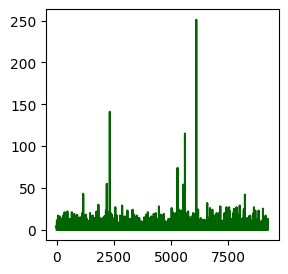

In [66]:
#TOTAL VISITS
ls.TotalVisits.plot(figsize=(3,3), color='darkgreen')

In [67]:
ls.TotalVisits.median()

3.0

In [68]:
ls.TotalVisits.describe()

count    8267.000000
mean        3.785533
std         4.964071
min         0.000000
25%         2.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

As there are outliers in "TotalVisits" column where max value is 251, imputing the missing values with median and the datatype is changed to Int as the count value can't be float

In [69]:
ls.TotalVisits.fillna(ls.TotalVisits.median(), inplace=True)
ls.TotalVisits = ls.TotalVisits.astype('int')

In [70]:
ls["Page Views Per Visit"].fillna(ls["Page Views Per Visit"].median(),inplace=True) #Imputed with median
ls.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0,0,0.0,Page Visited on Website,India,Not Provided,Unemployed,Better Career Prospects,Interested in other courses,Mumbai,No,Modified
1,API,Organic Search,No,0,5,674,2.5,Email Opened,India,Not Provided,Unemployed,Better Career Prospects,Ringing,Mumbai,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,No,1,2,1428,1.0,Converted to Lead,India,Not Provided,Unemployed,Better Career Prospects,Will revert after reading the email,Mumbai,No,Modified


In [71]:
ls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8318 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    8318 non-null   object 
 1   Lead Source                                    8318 non-null   object 
 2   Do Not Email                                   8318 non-null   object 
 3   Converted                                      8318 non-null   int64  
 4   TotalVisits                                    8318 non-null   int64  
 5   Total Time Spent on Website                    8318 non-null   int64  
 6   Page Views Per Visit                           8318 non-null   float64
 7   Last Activity                                  8318 non-null   object 
 8   Country                                        8318 non-null   object 
 9   Specialization                                 8318 

In [72]:
round(100*(ls.isnull().sum()/len(ls.index)),2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Tags                                             0.0
City                                             0.0
A free copy of Mastering The Interview           0.0
Last Notable Activity                            0.0
dtype: float64

Data cleaning is completed, modified values by imputing and removing redundant records.

**Step 3: EXPLORATORY DATA ANALYSIS**

In [73]:
ls.columns.tolist()

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Tags',
 'City',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [74]:
num_col=["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]
obj_col=['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Converted',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Tags',
 'City',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']
print (num_col)
print (obj_col)

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted', 'Last Activity', 'Country', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 'Tags', 'City', 'A free copy of Mastering The Interview', 'Last Notable Activity']


In [75]:
print(len(obj_col))

13


UNIVARIATE ANALYSIS

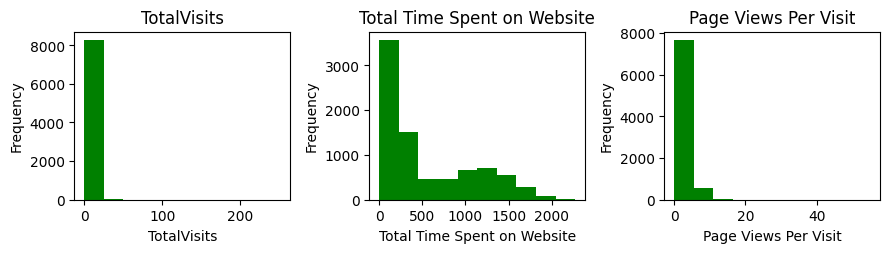

In [76]:
# Numerical Data - Histogram

a=4  # number of rows
b=3  # number of columns
c=1  # initialize plot counter
fig=plt.figure(figsize=(9,9))
for i in num_col:
    plt.subplot(a,b,c)
    plt.title('{},subplot:{}{}{}'.format(i,a,b,c))
    plt.xlabel(i)
    plt.title(i)
    ls[i].plot.hist(color='g')
    c=c+1
fig.tight_layout()
plt.show()


**observation:**

--> Outliers need to be checked as the plot is skewed and also the peak is relatively high

CATEGORICAL COLUMNS

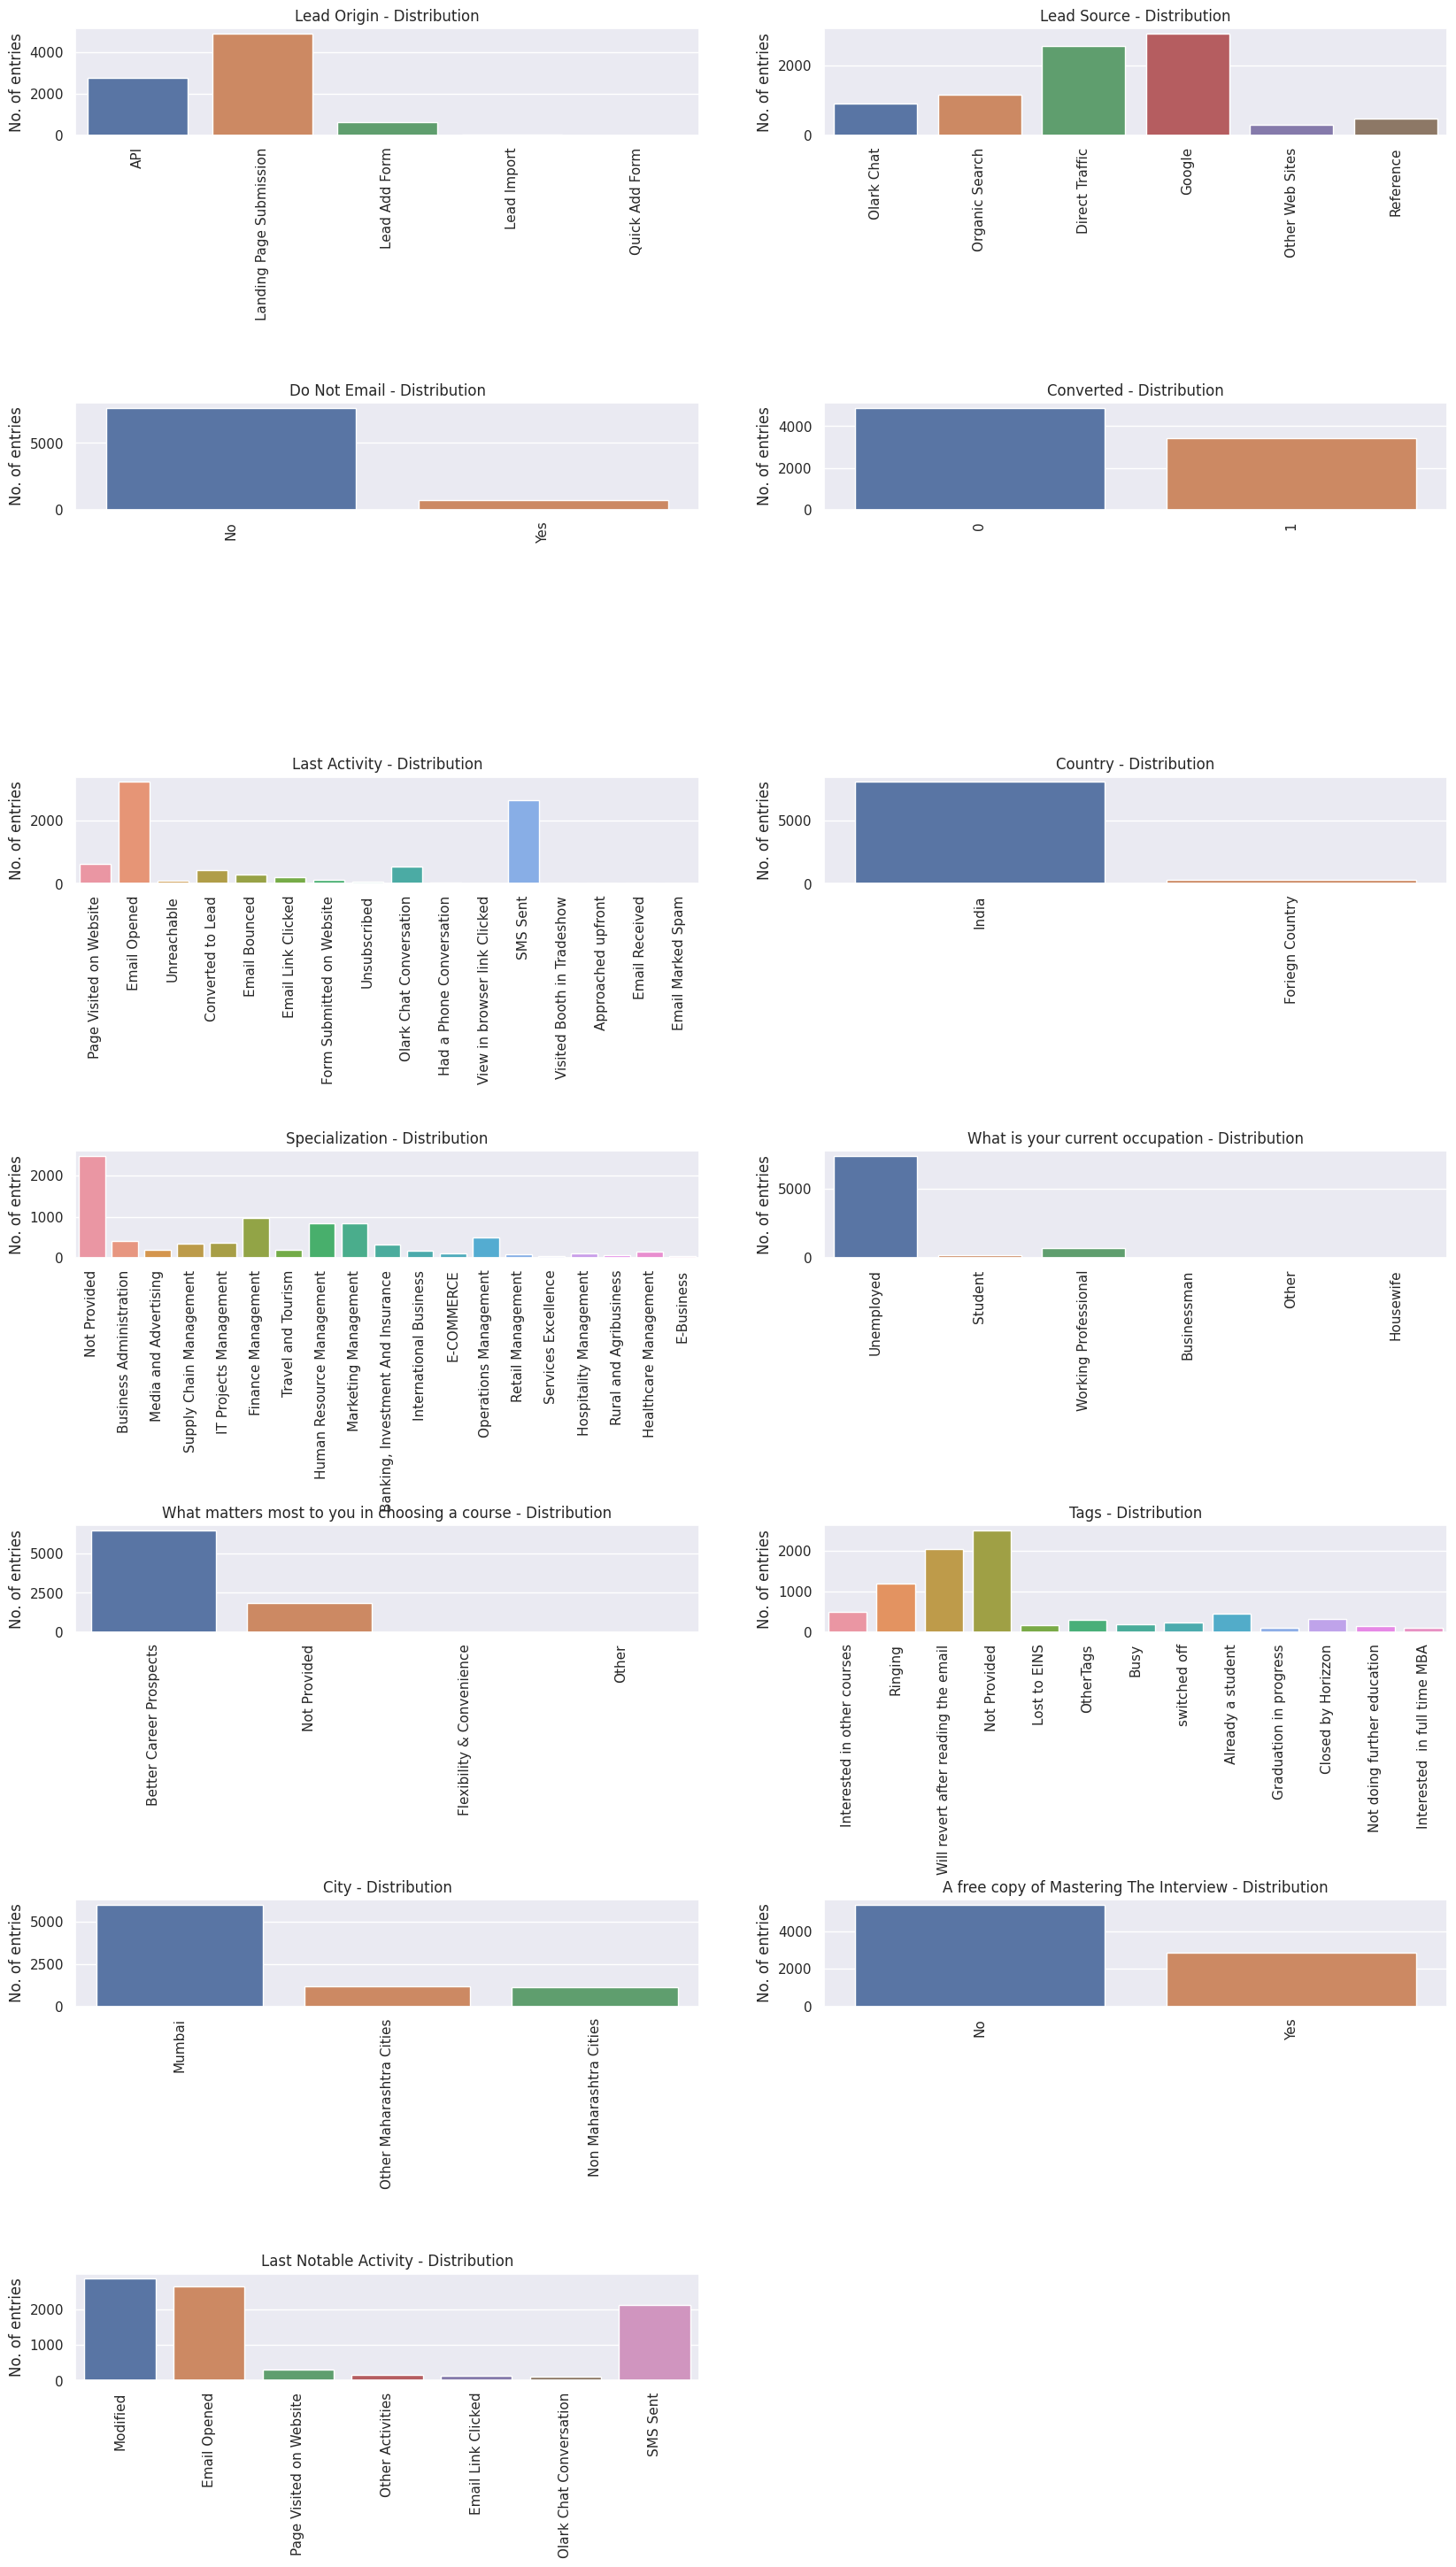

In [80]:
sns.set(style="darkgrid")
# Visualising the histogram of the distribution of all categorical variables
plt.figure(figsize=(20,40))
for i in range(len(obj_col)):
    plt.subplot(8, 2, i+1)
    var=obj_col[i]
    sns.countplot(x=var, data=ls)
    plt.title(var+' - Distribution')
    plt.ylabel('No. of entries')
    plt.xticks(rotation=90)
    plt.xlabel(None)
    plt.subplots_adjust(hspace = 2.5)

Observations:

-->'Lead Origin' - Landing page submission & API have the highest count

-->'Lead Source' - Google, Direct Traffic have the highest count


-->'Do Not Email' - Most people choosed No, We need to check the percentage of people choosed Yes.

-->'Last Activity' - This also we need to analyse depending on Convereted. SMS Sent and Email Opened are the highest in count

-->'Country' - Maximum customers are from India

--> 'Specialization' - Among the options choosed Finance Management, Human Resource and Marketing Management are higest count but not selected by majority.

--> Also most of the users are currently unemployed.

--> Most of the users are from Mumbai.

PLOTTING CATEGORICAL VARIABLES WRT CONVERTED

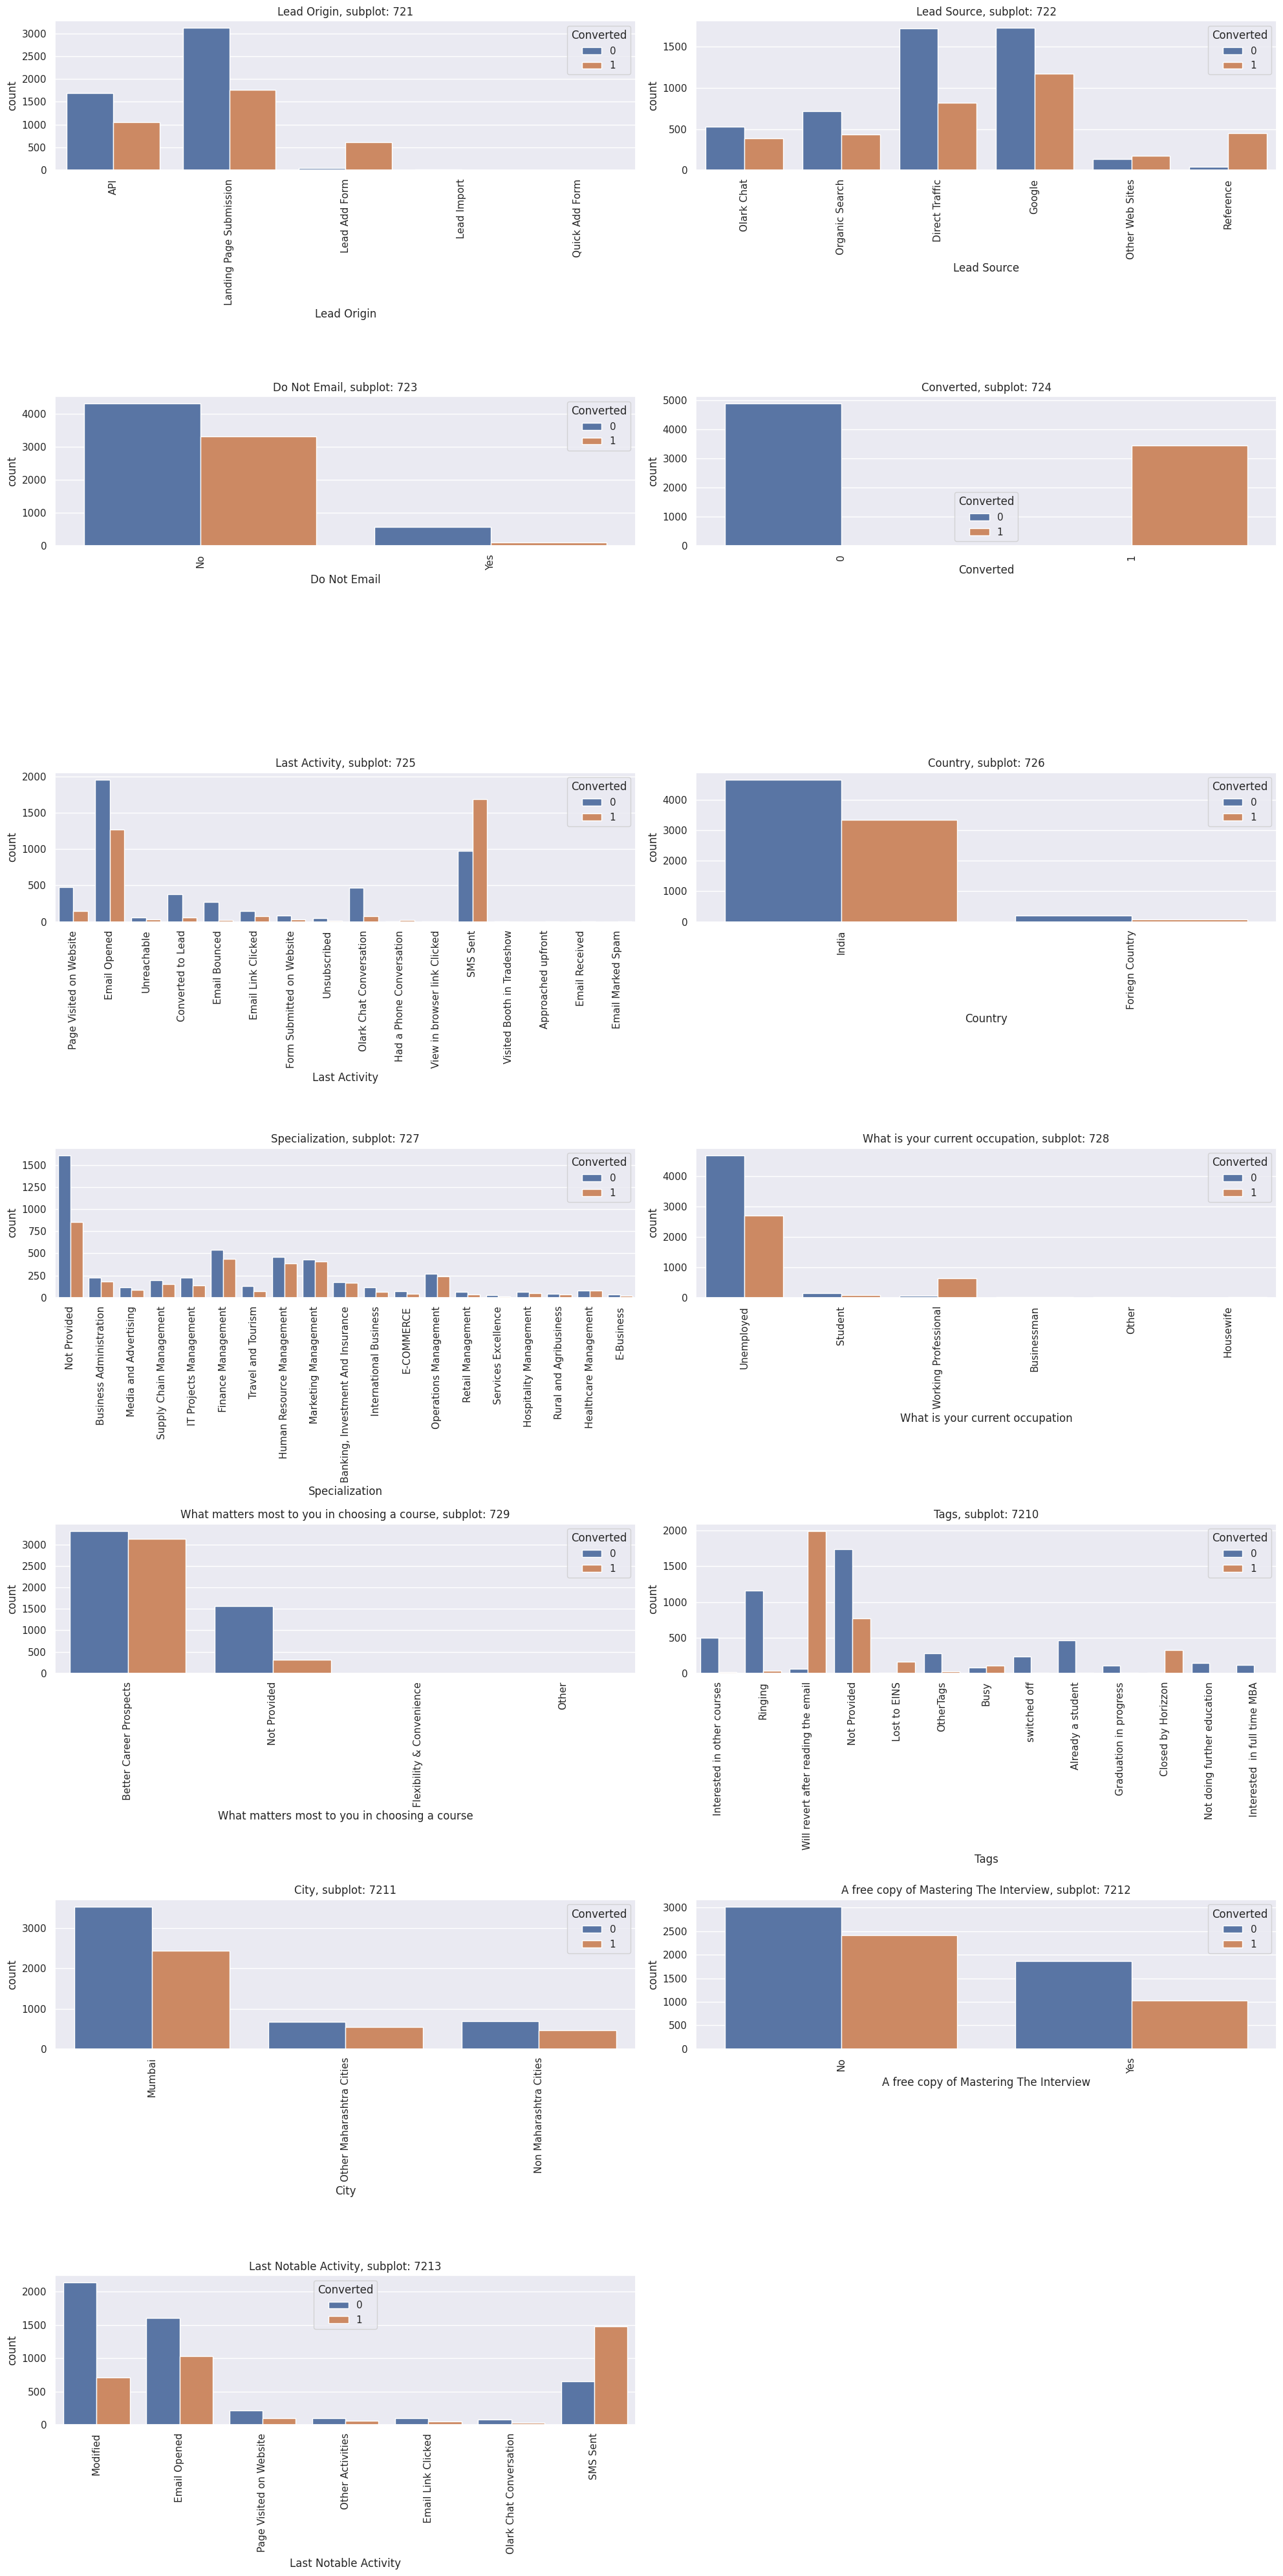

In [98]:
a=7  # number of rows
b=2  # number of columns
c=1  # initialize plot counter
fig=plt.figure(figsize=(20,40))
for i in obj_col:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i,a,b,c))
    plt.xlabel(i)
    sns.countplot(x=ls[i],hue=ls["Converted"]).tick_params(axis='x', rotation = 90)
    c = c + 1
fig.tight_layout()
plt.show()

Observations:

-->'lead Origin'-Leads added from orgin are mostly positively converted

-->'Lead Source'-Leads from Reference and Other websites are also mostly converted positively.

-->Working Professionals convertion ratio is very high

-->'Tags'-Will revert after reading email, Closed by Horizon are getting mostly converted

-->'Last notable Activity' column shows "SMS Sent" have high ratio of positive convertion